<a href="https://colab.research.google.com/github/mmontielpz/premier-data-scout/blob/main/defensas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soccerdata

In [ ]:
import soccerdata as sd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[02/28/25 07:52:59] INFO     No custom team name replacements found. You can configure these in       ]8;id=6234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=576477;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=960741;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=761360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [ ]:
# Step 1: Initialize FBref for the English Premier League season 2023
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2023)

[02/28/25 07:53:01] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=620783;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=515124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

In [ ]:
# Step 2: Read player season defensive statistics
player_def_stats = fbref.read_player_season_stats(stat_type="defense")

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=714745;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=807591;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [ ]:
# Step 3: Flatten multi-level columns if necessary
if isinstance(player_def_stats.columns[0], tuple):
    player_def_stats.columns = [f"{col1}_{col2}" if col2 else col1
                                 for col1, col2 in player_def_stats.columns]

In [ ]:
# Step 4: Inspect the available columns
print("Available columns in defensive stats:")
print(player_def_stats.columns.tolist())

Available columns in defensive stats:
['nation', 'pos', 'age', 'born', '90s', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd', 'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att', 'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh', 'Blocks_Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']


In [ ]:
player_def_stats.head()

nation pos  age  born   90s  \
league             season team    player                                       
ENG-Premier League 2324   Arsenal Aaron Ramsdale    ENG  GK   25  1998   6.0   
                                  Ben White         ENG  DF   25  1997  33.2   
                                  Bukayo Saka       ENG  FW   21  2001  32.4   
                                  Cédric Soares     POR  DF   31  1991   0.7   
                                  David Raya        ESP  GK   27  1995  32.0   

                                                  Tackles_Tkl  Tackles_TklW  \
league             season team    player                                      
ENG-Premier League 2324   Arsenal Aaron Ramsdale            0             0   
                                  Ben White                48            28   
                                  Bukayo Saka              66            35   
                                  Cédric Soares             0             0   
                                  David Raya                1             1   

                                                  Tackles_Def 3rd  \
league             season team    player                            
ENG-Premier League 2324   Arsenal Aaron Ramsdale                0   
                                  Ben White                    20   
                                  Bukayo Saka                  22   
                                  Cédric Soares                 0   
                                  David Raya                    1   

                                                  Tackles_Mid 3rd  \
league             season team    player                            
ENG-Premier League 2324   Arsenal Aaron Ramsdale                0   
                                  Ben White                    22   
                                  Bukayo Saka                  24   
                                  Cédric Soares                 0   
                                  David Raya                    0   

                                                  Tackles_Att 3rd  ...  \
league             season team    player                           ...   
ENG-Premier League 2324   Arsenal Aaron Ramsdale                0  ...   
                                  Ben White                     6  ...   
                                  Bukayo Saka                  20  ...   
                                  Cédric Soares                 0  ...   
                                  David Raya                    0  ...   

                                                  Challenges_Att  \
league             season team    player                           
ENG-Premier League 2324   Arsenal Aaron Ramsdale               0   
                                  Ben White                   58   
                                  Bukayo Saka                 59   
                                  Cédric Soares                0   
                                  David Raya                   1   

                                                  Challenges_Tkl%  \
league             season team    player                            
ENG-Premier League 2324   Arsenal Aaron Ramsdale             <NA>   
                                  Ben White                  44.8   
                                  Bukayo Saka                44.1   
                                  Cédric Soares              <NA>   
                                  David Raya                100.0   

                                                  Challenges_Lost  \
league             season team    player                            
ENG-Premier League 2324   Arsenal Aaron Ramsdale                0   
                                  Ben White                    32   
                                  Bukayo Saka                  33   
                                  Cédric Soares                 0   
                                  David Raya                    0   

  

In [ ]:
# Step 5: Define the columns related to defensive actions
defensive_columns = ["Tackles_Tkl", "Int", "Blocks_Blocks", "90s", "Clr", "Err"]
for col in defensive_columns:
    if col not in player_def_stats.columns:
        raise ValueError(f"Column {col} not found in DataFrame. Please adjust column names.")

In [ ]:
# Step 6: Compute a composite defense score: Tackles + Interceptions + Blocks per 90 minutes
player_def_stats["defense_score"] = (
    player_def_stats["Tackles_Tkl"] +
    player_def_stats["Int"] +
    player_def_stats["Blocks_Blocks"]
) / player_def_stats["90s"]

In [ ]:
player_def_stats = player_def_stats[player_def_stats["90s"] > 0]

In [ ]:
# Step 7: Compute an adjusted defense score considering clearances and errors
player_def_stats["adjusted_defense_score"] = (
    (player_def_stats["Tackles_Tkl"] + player_def_stats["Int"] + player_def_stats["Blocks_Blocks"] + player_def_stats["Clr"])
    / (player_def_stats["90s"] + 1)  # Avoid division by zero
) - player_def_stats["Err"]  # Penalizing errors


[02/28/25 07:53:02] WARNING  <ipython-input-11-27797aefb046>:2: SettingWithCopyWarning:             ]8;id=231823;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=888537;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               player_def_stats["adjusted_defense_score"] = (                                      
                                                                                                                   

In [ ]:
# Step 8: Filter only defenders (assuming position is in column 'pos' and contains 'DF')
defenders = player_def_stats[player_def_stats["pos"].str.contains("DF", na=False)]

In [ ]:
# Step 9: Further filter for younger players (low-cost proxy: under 25 years old)
cheap_defenders = defenders[defenders["age"] < 25]

In [ ]:
# Step 10: Sort by adjusted defensive score in descending order and select top 10
top_defenders = cheap_defenders.sort_values(by="adjusted_defense_score", ascending=False).head(10)

top_defenders = top_defenders.reset_index()

print("\nTop 10 Defensive Players (Under 25) by Adjusted Defense Score:")
top_defenders[['player', 'pos', 'age', 'adjusted_defense_score', 'Tackles_Tkl', 'Int', 'Blocks_Blocks', '90s', 'Clr', 'Err']]


Top 10 Defensive Players (Under 25) by Adjusted Defense Score:


,player,pos,age,adjusted_defense_score,Tackles_Tkl,Int,Blocks_Blocks,90s,Clr,Err
0,Murillo,DF,21,9.875,50,37,41,31.0,188,0
1,Neco Williams,DF,22,9.791667,69,22,44,18.2,53,0
2,James Hill,DF,21,9.444444,3,3,3,0.8,8,0
3,Gabriel Osho,DF,24,9.348837,41,31,37,20.5,92,0
4,Teden Mengi,DF,21,9.211268,54,57,39,27.4,140,1
5,Chris Richards,"DF,MF",23,8.806584,46,27,32,23.3,109,0
6,Jordan Beyer,DF,23,8.591837,35,16,22,13.7,68,1
7,Maxime Estève,DF,21,8.451613,27,27,21,14.5,56,0
8,Emerson,DF,24,8.280576,36,20,23,12.9,50,1
9,Vitaliy Mykolenko,DF,24,8.204225,69,36,36,27.4,92,0


In [ ]:
# Generate Structured Report
report = """
# Defensive Player Analysis Report
## Introduction
This report evaluates the best young defensive players in the Premier League, considering key defensive actions and errors.

## Descriptive Statistics
"""
report += str(player_def_stats[['defense_score', 'adjusted_defense_score', 'Tackles_Tkl', 'Int', 'Blocks_Blocks', '90s', 'Clr', 'Err']].describe())
report += """

## Top Defensive Players (Under 25)
"""
report += top_defenders[['player', 'pos', 'age', 'adjusted_defense_score', 'Tackles_Tkl', 'Int', 'Blocks_Blocks', '90s', 'Clr', 'Err']].to_string(index=False)
report += """

## Correlation Analysis
"""
corr_matrix = player_def_stats[['adjusted_defense_score', 'Tackles_Tkl', 'Int', 'Blocks_Blocks', '90s', 'Clr', 'Err']].corr()
report += str(corr_matrix)

In [ ]:
print(report)


# Defensive Player Analysis Report
## Introduction
This report evaluates the best young defensive players in the Premier League, considering key defensive actions and errors.

## Descriptive Statistics
       defense_score  adjusted_defense_score  Tackles_Tkl        Int  \
count          560.0                   560.0        560.0      560.0   
mean        3.868462                3.890295      23.9625  11.260714   
std         2.961121                2.685919    23.935894  12.582887   
min              0.0               -5.243421          0.0        0.0   
25%         2.451868                2.056878          4.0        1.0   
50%         3.619534                3.759937         18.0        7.0   
75%         4.872053                5.835396        36.25       18.0   
max             30.0               11.352941        152.0       80.0   

       Blocks_Blocks        90s        Clr       Err  
count          560.0      560.0      560.0     560.0  
mean         16.6125  14.897143  27.81

                    WARNING  <ipython-input-17-b9960994e186>:3: FutureWarning:                      ]8;id=165779;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=39829;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x="adjusted_defense_score", y="player",                                 
                             data=top_defenders, palette="rocket")                                                 
                                                                                                                   

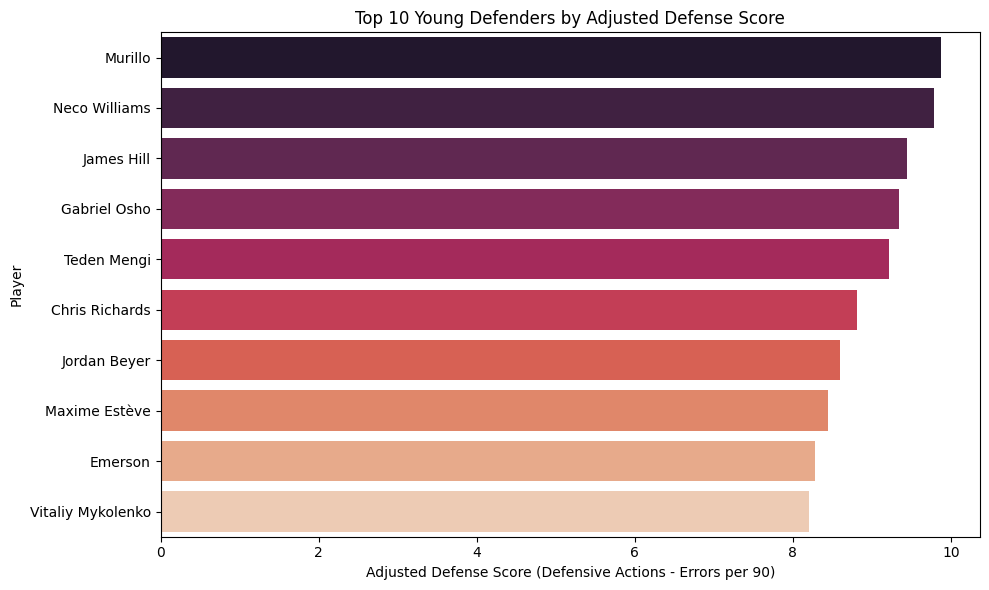

In [ ]:
# Step 11: Plot a horizontal bar chart of the best young defenders by adjusted defense score
plt.figure(figsize=(10, 6))
sns.barplot(x="adjusted_defense_score", y="player", data=top_defenders, palette="rocket")
plt.title("Top 10 Young Defenders by Adjusted Defense Score")
plt.xlabel("Adjusted Defense Score (Defensive Actions - Errors per 90)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


### **📊 Datos Clave**  

**Murillo es el Mejor Defensa Joven**  
   - Tiene el **puntaje defensivo ajustado más alto**, lo que indica que **realiza muchas acciones defensivas y comete pocos errores**.  
   - Para un club que busque un **defensor joven y con alto rendimiento**, **Murillo debería ser la primera opción**.  

**Neco Williams y James Hill son Grandes Contendientes**  
   - Están **muy cerca de Murillo**, lo que significa que también **destacan defensivamente con pocos errores**.  
   - Podrían ser **buenas inversiones** para equipos que necesiten **profundidad en defensa**.  

**Gabriel Osho y Teden Mengi Tienen un Rendimiento Fuerte**  
   - Están **por encima del promedio**, lo que los convierte en **opciones confiables**.  
   - Si su **valor de mercado es bajo**, podrían ser **fichajes rentables** para cualquier equipo.  

**Chris Richards, Jordan Beyer y Maxime Estève en el Rango Medio**  
   - Son **defensores sólidos**, pero tal vez necesiten **mejorar en algunas áreas**.  
   - Si aumentan sus **acciones defensivas o reducen errores**, podrían alcanzar el **nivel élite**.  

**Emerson y Vitaliy Mykolenko Tienen el Puntaje Más Bajo del Top 10**  
   - Aunque siguen siendo **defensores destacados**, podrían ser más **propensos a errores o menos activos en duelos defensivos**.  
   - Los entrenadores podrían trabajar en **mejorar su toma de decisiones** para que **suban en el ranking**.  


### **📌 Conclusión y Recomendaciones**  

* Murillo, Neco Williams y James Hill son los defensores más prometedores.  

* Gabriel Osho y Teden Mengi tienen un gran desempeño, pero ligeramente por detrás del grupo élite.  

* Emerson y Mykolenko aún tienen margen de mejora, pero siguen dentro del top 10 de jóvenes defensores.

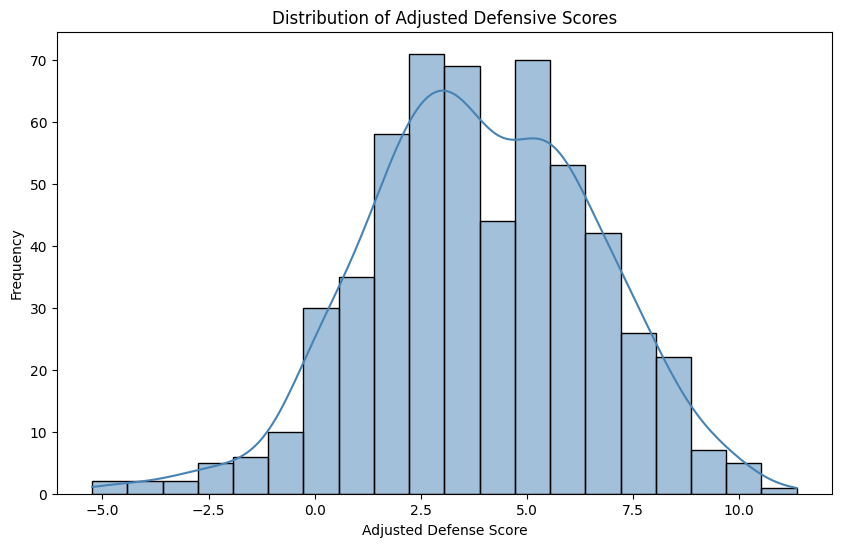

In [ ]:
# Step 12: Analyze the distribution of defensive scores
plt.figure(figsize=(10,6))
sns.histplot(player_def_stats['adjusted_defense_score'].dropna(), bins=20, kde=True, color="steelblue")
plt.title("Distribution of Adjusted Defensive Scores")
plt.xlabel("Adjusted Defense Score")
plt.ylabel("Frequency")
plt.show()

### **📊 Datos Clave**  

**Distribución Casi Normal con Ligera Asimetría Positiva**  
   - La mayoría de los jugadores tienen **puntajes defensivos entre 2 y 6**, con una alta concentración alrededor de **3-5 puntos**.  
   - Hay **pocos jugadores con puntajes extremadamente altos (>10)**, lo que sugiere que **los defensores de élite son raros**.  
   - También hay **algunos jugadores con puntajes negativos (<0)**, lo que indica que sus errores superan sus acciones defensivas positivas.  

**Presencia de Jugadores con Rendimiento Defensivo Muy Bajo**  
   - Hay una **cola a la izquierda**, mostrando que **algunos defensores tienen puntajes negativos**, lo que implica **bajo rendimiento o una alta cantidad de errores cometidos**.  
   - Estos jugadores pueden ser **defensores en mala forma, fuera de posición o con falta de disciplina defensiva**.  

**Pequeña Segunda Moda (Doble Pico en la Distribución)**  
   - Se nota una **ligera doble moda (dos picos en la curva KDE)**.  
   - Esto podría indicar que hay **dos grupos de defensores**:
     - **Grupo Principal (3-6 puntos):** Defensores promedio o sólidos.  
     - **Grupo de Alto Rendimiento (>7 puntos):** Defensores de élite que destacan en múltiples métricas.  

### **📌 Conclusión y Recomendaciones**

* La mayoría de los defensores tienen un puntaje defensivo ajustado entre 3 y 6, lo que define el "promedio" de rendimiento en la liga.

* Los defensores con puntajes negativos pueden representar jugadores con errores frecuentes o bajo impacto defensivo.

* Los jugadores con puntajes superiores a 7 son los más destacados y deberían ser objetivo de scouting y análisis en detalle.

* Si hay una doble moda, se recomienda hacer un análisis por clusters para entender los diferentes perfiles de defensores.

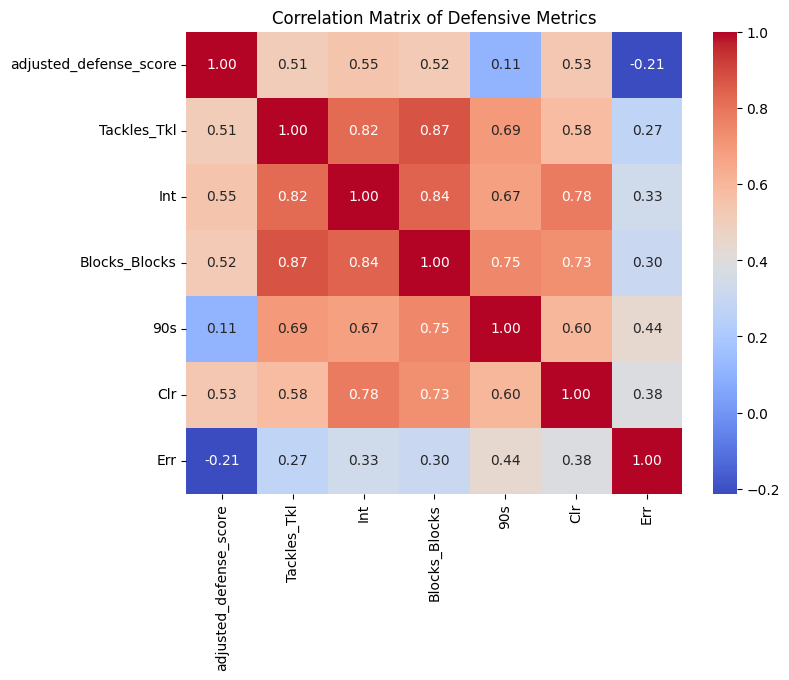

In [ ]:
# Step 13: Compute correlation between defensive metrics
corr_matrix = player_def_stats[['adjusted_defense_score', 'Tackles_Tkl', 'Int', 'Blocks_Blocks', '90s', 'Clr', 'Err']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Defensive Metrics")
plt.show()

### **📊 Datos Clave**  

**Alta Correlación Entre las Acciones Defensivas Clásicas**  
   - **Tackles (Entradas), Interceptions (Intercepciones) y Blocks (Bloqueos) tienen una correlación fuerte entre sí (≥0.80)**.  
   - Esto indica que los jugadores que **realizan muchas entradas también tienden a interceptar y bloquear balones con frecuencia**.  
   - Sugiere que estos valores pueden ser **indicadores clave** del rendimiento defensivo.  

**Puntaje Defensivo Ajustado Está Moderadamente Relacionado con las Acciones Defensivas**  
   - **Correlación moderada con Tackles (0.51), Interceptions (0.55) y Blocks (0.52)**.  
   - Aunque estas métricas influyen en el puntaje defensivo, **no son las únicas determinantes**.  
   - **Otros factores, como errores y contexto de juego, afectan la calificación general del defensor**.  

**Relación Entre Minutos Jugados (90s) y Otras Métricas**  
   - **Los jugadores que han jugado más partidos (90s) tienden a tener más bloqueos (0.75), entradas (0.69) e intercepciones (0.67)**.  
   - Esto tiene sentido: **a mayor tiempo en cancha, más oportunidades para intervenir en defensa**.  
   - Sin embargo, **la correlación con el puntaje defensivo ajustado es muy baja (0.11)**, lo que indica que **jugar más minutos no garantiza un mejor rendimiento defensivo**.  

**Errores (Err) Tienen un Impacto Negativo en el Rendimiento**  
   - **Correlación negativa con el Puntaje Defensivo Ajustado (-0.21)**, lo que indica que **más errores reducen la calificación del defensor**.  
   - Los errores también tienen **una relación baja con los tackles (0.27), intercepciones (0.33) y bloqueos (0.30)**.  
   - Esto podría significar que **algunos defensores agresivos en duelos defensivos también cometen errores**, lo que sugiere la necesidad de **evaluar el equilibrio entre agresividad y precisión en la defensa**.  

### **📌 Conclusión y Recomendaciones**  

* Los tackles, intercepciones y bloqueos son los mejores indicadores del desempeño defensivo** (alta correlación).  

* Jugar más minutos no implica ser un mejor defensor; la calidad de las acciones defensivas es más importante que la cantidad.

* Los errores afectan negativamente el puntaje defensivo, pero algunos jugadores con muchas acciones defensivas también pueden cometer más errores.

* Se recomienda analizar jugadores con altas acciones defensivas y bajos errores para encontrar los defensores más efectivos.

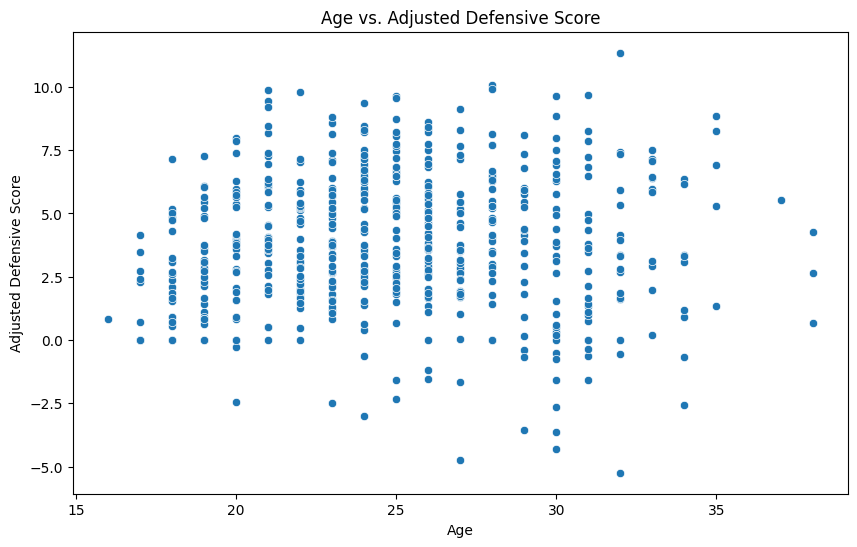

In [ ]:
# Step 14: Plot Defensive Score vs Age
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="adjusted_defense_score", data=player_def_stats)
plt.title("Age vs. Adjusted Defensive Score")
plt.xlabel("Age")
plt.ylabel("Adjusted Defensive Score")
plt.show()

### **📊 Datos Clave**  

**Los Jugadores Jóvenes (18-23 años) Tienen un Rendimiento Variado**  
   - Hay **una alta dispersión** en este grupo: algunos tienen puntajes muy altos (**>8**), mientras que otros están en **rangos negativos**.  
   - Esto sugiere que los **jóvenes defensores pueden ser inconsistentes**, con algunos **sobresaliendo y otros luchando por adaptarse**.  

**Los Defensores de 24-30 Años Alcanzan el Pico del Rendimiento**  
   - La mayoría de los **puntajes defensivos altos** (entre 5 y 10) se encuentran en este rango de edad.  
   - Esto sugiere que los jugadores en este grupo han **desarrollado experiencia y estabilidad en su rendimiento defensivo**.  

**Los Defensores Mayores de 30 Años Mantienen un Buen Rendimiento, Pero con Mayor Variabilidad**  
   - Algunos jugadores aún tienen **puntajes altos (>8)**, lo que sugiere que **la experiencia es valiosa en la defensa**.  
   - Sin embargo, hay más jugadores con **puntajes defensivos bajos** en este rango, indicando que **la edad puede afectar el rendimiento físico y la capacidad de respuesta en defensa**.  

**No Hay una Tendencia Fuerte en la Relación Edad-Rendimiento**  
   - Aunque parece que el **mejor rendimiento está entre los 24-30 años**, la variabilidad en cada grupo es alta.  
   - No hay una clara correlación negativa entre edad y rendimiento, lo que indica que **el declive defensivo no es inmediato con la edad**.  

### **📌 Conclusión y Recomendaciones**  

* Los defensores de 24-30 años son los más consistentes en su rendimiento, lo que los convierte en la mejor opción para equipos que buscan estabilidad defensiva.

* Los jugadores jóvenes pueden ser apuestas arriesgadas, pero algunos tienen un gran potencial de crecimiento.

* Los defensores mayores de 30 años aún pueden ser efectivos, pero deben ser evaluados individualmente para evitar fichajes de jugadores en declive físico.

* No hay una tendencia clara de declive con la edad, lo que sugiere que la experiencia y la táctica pueden compensar la pérdida de capacidad física.

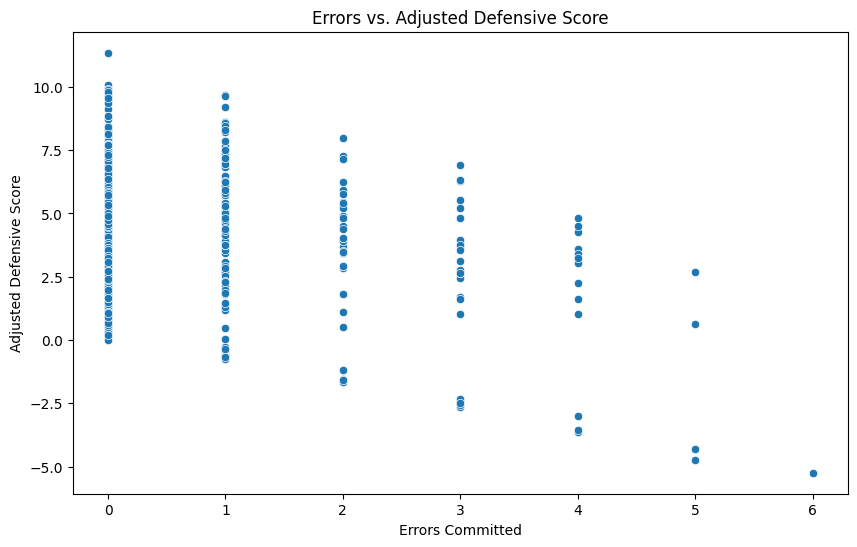

In [ ]:
# Step 15: Compare defensive score with match losses
plt.figure(figsize=(10,6))
sns.scatterplot(x="Err", y="adjusted_defense_score", data=player_def_stats)
plt.title("Errors vs. Adjusted Defensive Score")
plt.xlabel("Errors Committed")
plt.ylabel("Adjusted Defensive Score")
plt.show()

### **📊 Datos Clave**  

**Los Defensores con Cero Errores Tienen el Rango Más Amplio de Rendimiento**  
   - Hay jugadores con **altos puntajes defensivos (>10)** que no han cometido errores, lo que sugiere que **los mejores defensores son seguros y confiables**.  
   - Sin embargo, algunos jugadores sin errores tienen puntajes bajos, lo que significa que **evitar errores no es suficiente para ser un gran defensor**.  

**A Mayor Cantidad de Errores, Menor Es el Puntaje Defensivo Ajustado**  
   - Se observa una **tendencia descendente**: los jugadores con **más de 3 errores** suelen tener puntajes defensivos bajos o negativos.  
   - Esto confirma que **cometer errores penaliza significativamente el rendimiento general del defensor**.  

**Pocos Jugadores Cometen Más de 4 Errores**  
   - La mayoría de los defensores cometen **entre 0 y 3 errores**, lo que indica que los errores son **relativamente poco frecuentes** en la muestra.  
   - Aquellos que han cometido **5 o más errores tienen en su mayoría puntajes negativos**, lo que sugiere que podrían ser **riesgosos para el equipo**.  

**Algunos Jugadores con 2-4 Errores Aún Mantienen Buenos Puntajes**  
   - Hay algunos defensores con **3-4 errores que aún tienen puntajes defensivos superiores a 5**.  
   - Esto podría significar que algunos defensores son **agresivos y activos en defensa**, lo que conlleva más errores pero también más acciones defensivas exitosas.  

### **📌 Conclusión y Recomendaciones**  

* Los mejores defensores no solo tienen muchas acciones defensivas, sino que también cometen pocos errores.

* Los jugadores con 3 o más errores tienden a tener un menor puntaje defensivo, lo que sugiere que los errores son un factor clave en el rendimiento.

* Si un defensor con un puntaje alto tiene algunos errores, podría ser un defensor de alto riesgo-alta recompensa.

* Para seleccionar defensores confiables, se deben priorizar aquellos con buenos puntajes defensivos y menos de 2 errores.

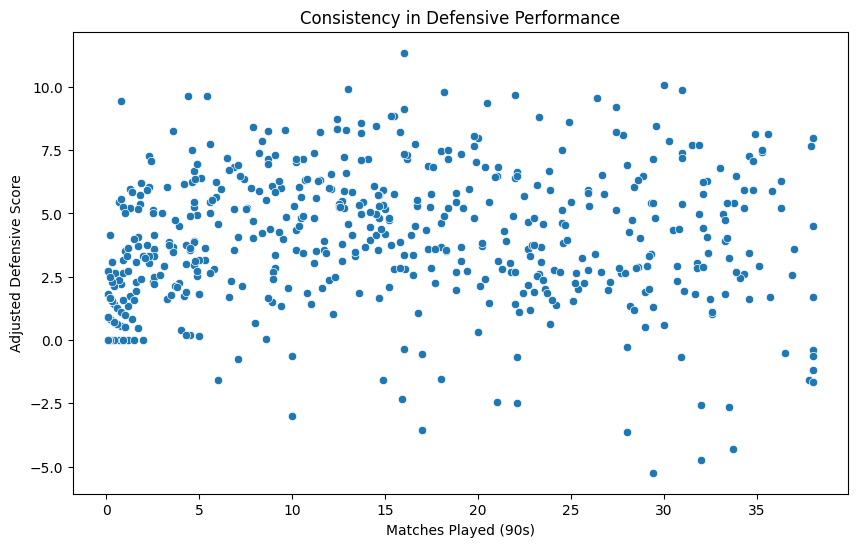

In [ ]:
# Step 16: Identify defensive consistency over multiple matches
plt.figure(figsize=(10,6))
sns.scatterplot(x="90s", y="adjusted_defense_score", data=player_def_stats)
plt.title("Consistency in Defensive Performance")
plt.xlabel("Matches Played (90s)")
plt.ylabel("Adjusted Defensive Score")
plt.show()

### **📊 Datos Clave**  

**No Hay una Tendencia Fuerte Entre Partidos Jugados y Rendimiento**  
   - Los jugadores que han disputado **muchos partidos (20-35 juegos)** tienen puntajes defensivos **tanto altos como bajos**.  
   - Esto sugiere que **jugar más partidos no garantiza un alto rendimiento defensivo**, sino que la calidad del defensor es más importante.  

**Los Jugadores con Pocos Partidos (0-5) Tienen Mayor Variabilidad**  
   - Hay una **alta dispersión en jugadores con menos de 5 partidos**, lo que indica que algunos pueden haber **tenido actuaciones excepcionales en pocos encuentros**, pero otros han mostrado un **rendimiento bajo**.  
   - Esto puede significar que jugadores **con poca participación pueden tener un gran potencial**, pero necesitan más minutos para demostrarlo.  

**Los Defensores Más Consistentes Se Encuentran en el Rango de 10-30 Partidos**  
   - En este rango, la mayoría de los jugadores tienen puntajes entre **3 y 8**, lo que sugiere que son **defensores confiables y con un rendimiento estable**.  
   - Esto podría ser un **buen punto de referencia** para identificar jugadores que han demostrado calidad durante un número razonable de partidos.  

**Algunos Defensores con Más de 30 Partidos Tienen Puntajes Bajos**  
   - Aunque algunos mantienen un puntaje defensivo alto, hay varios jugadores con **más de 30 partidos y puntajes bajos o negativos**.  
   - Esto podría indicar que algunos jugadores **son titulares por necesidad más que por rendimiento**, lo que sugiere que sus equipos podrían mejorar en defensa.  

### **📌 Conclusión y Recomendaciones**  

* Jugar más partidos no garantiza un alto rendimiento defensivo; la calidad del jugador es clave.

* Los jugadores con pocos minutos pero altos puntajes podrían ser talentos emergentes a seguir.

* Los defensores más consistentes se encuentran en el rango de 10-30 partidos jugados.

* Los jugadores con más de 30 partidos y bajo rendimiento podrían ser reemplazables en sus equipos.